# **Présentation, nos joueurs artificiels afin de jouer à l'Awale.**

---





* [I. Création de l'IA, l'algorithme minmax.](#chapter1)
    * [I.1. Comparaison de MinMax et MinMax Alpha/Béta.](#section_1_1)
    * [I.2. Différentes idées d'heuristiques.](#section_1_2)
* [II. Pour aller plus loin, un joueur utilisant le Machine Learning.](#chapter2)
* [III. Annexe.](#Annexe)

In [ ]:
import os
from google.colab import drive
drive.mount('drive')

!mkdir -p drive -v

cwd = os.getcwd()

monchemin = 'drive/My Drive/Minmax edited/'

dir_path=os.path.join(cwd, monchemin)
dirs =os.listdir(dir_path)
print(dir_path)
print (dirs)

os.chdir(dir_path)

!export PYTHONPATH=$PYTHONPATH:dir_path


Mounted at drive
/content/drive/My Drive/Minmax edited/
['Cours2_ECM_IA_et_Jeux 2.pdf', 'awaleplateau.jpg', 'Games', 'Awale', 'Utile', 'Notebooks', 'Chess', 'abel', '.ipynb_checkpoints', 'ABvariable7vsABvariable75000_FullGames_AllisSouth.npy', 'Modeles']


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
import sys

from Games.Games import Game, play_game
from Awale.AwaleGame import AwaleGame
from Awale.Feval_Awale import *
from Games.Players import *
from Games.Players import H1Player
from Games.Players import MinmaxPlayer
from Games.Players import alphabetaplayer



# **I.Création de l'IA, l'algorithme minmax.**

# **I.1.Après avoir implémenté un joueur MinMax alpha/béta nous allons observer l'efficacité de ce dernier par rapport au joueur minmax classique.** 

In [ ]:
L = []
for k in range (1,6):
  a,b,c,d = play_game(AwaleGame(), MinmaxPlayer(fevalAwaleSouth,k),alphabetaplayer(fevalAwaleNorth,k))
  L.append([k,b,c,d])

### Dans le code précédent, 'k' représente la profondeur explorée, 'b' le nombre de noeuds explorés par le joueur Sud (ici un joueur Min/Max simple), 'c' le nombre de noeuds explorés par le joueur Nord (ici un joueur Min/Max alpha/beta) et 'd' le nombre de tours joués (à chaque fois que l'un des joueurs joue, cela compte pour 1 tour).

In [ ]:
X = [L[i][0] for i in range (0,5)]
Y1 = [L[i][1] for i in range (0,5)]
Y2 = [L[i][2] for i in range (0,5)]

Text(0.5, 1.0, 'Comparaison du nombre de noeud exploré par MinMax simple et MinMax Alpha/Beta')

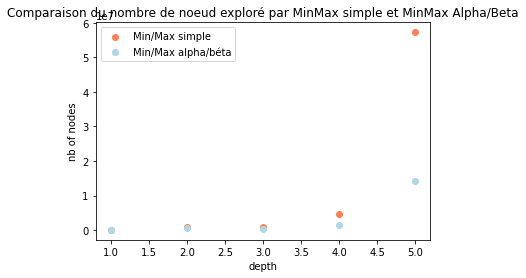

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, Y1, c='coral',label='Min/Max simple')
plt.scatter(X, Y2, c='lightblue',label='Min/Max alpha/béta')
plt.xlabel("depth")
plt.ylabel("nb of nodes")
plt.legend(loc='upper left')
plt.title('Comparaison du nombre de noeud exploré par MinMax simple et MinMax Alpha/Beta')

### Ainsi, on remarque que plus la profondeur explorée est grande, plus il est avantageux d'utiliser alpha/béta plutôt que MinMax simple.

# **I.2.Comparaison avec une seconde fonction d'évaluation.**

### On a créé un tournoi entre deux joueurs qui s'affrontent durant 10 parties. Puis les différents joueurs se rencontrent.

In [ ]:
def rencontre_result_South(first_game, j1, j2,N):
  v1=0 #victoires joueur 1
  v2=0 #victoires joueur 2
  n=0 #matchs nuls
  game = first_game
  for i in range(N):
    game = AwaleGame()
    r = play_game(game,j1,j2)[0]
    if r==0: v1+=1
    elif r==1: v2+=1
    else: n+=1
  return v1/(N+.0), v2/(N+.0), n/(N+.0)

### Sur les tableaux suivants, chaque valeur représente le taux de victoire (pris sur 10 parties) du joueur Sud.

In [ ]:
import numpy as np
import pandas as pd

L = np.zeros((3,3))
for i in range (1,len(L)+1):
  for j in range (1,len(L[0])+1):
    L[i-1][j-1] = rencontre_result_South(AwaleGame(), alphabetaplayer(fevalAwaleSouthbis,i),alphabetaplayer(fevalAwaleNorth,j),10)[1]
M = np.zeros((3,3))
for i in range (1,len(L)+1):
  for j in range (1,len(L[0])+1):
    M[i-1][j-1] = rencontre_result_South(AwaleGame(), alphabetaplayer(fevalAwaleSouth,i),alphabetaplayer(fevalAwaleNorthbis,j),10)[1]

In [ ]:
column1 = ['fevalbis_depthSouth1' , 'fevalbis_depthSouth1' , 'fevalbis_depth3South']
index1 = ['feval_depth1North' , 'feval_depth2North' , 'feval_depth3North']
df1 = pd.DataFrame(data=L,index=index1,columns=column1)
index2 = ['fevalbis_depth1North' , 'fevalbis_depth2North' ,  'fevalbis_depth3North']
column2 = ['feval_depthSouth1' , 'feval_depthSouth2' , 'feval_depthSouth3']
df2 = pd.DataFrame(data=M,index=index2,columns=column2)


### On affiche deux tableaux puisque l'interprétation d'un résultat obtenu uniquement avec un tableau serait limitée. En effet, le jeu d'Awale est fondamentalement biaisé puisque le joueur qui commence a de plus grandes chances de gagner la partie.

In [ ]:
df1

,fevalbis_depthSouth1,fevalbis_depthSouth1,fevalbis_depth3South
feval_depth1North,0.3,0.5,0.6
feval_depth2North,0.0,0.5,0.9
feval_depth3North,0.1,0.2,0.5


In [ ]:
df2

,feval_depthSouth1,feval_depthSouth2,feval_depthSouth3
fevalbis_depth1North,0.2,0.8,0.9
fevalbis_depth2North,0.3,0.3,0.7
fevalbis_depth3North,0.4,0.3,0.6


In [ ]:
def fevalAwaleNorth(self,game, state, depth,action):
  if game.utility(state, self)==1:
    return float("+inf")
  elif game.utility(state, self)==0:
    return float("-inf")
  else:
    scores = state.score
    return (scores[1]-scores[0])*(1+0.03*np.random.randn())

def fevalAwaleSouth(self,game, state, depth,action):
  if game.utility(state, self)==1:
    return float("-inf")
  elif game.utility(state, self)==0:
    return float("+inf")
  else:
    scores = state.score
    return (scores[0]-scores[1])*(1+0.03*np.random.randn())

####################################

def fevalAwaleNorthbis(self,game, state, depth,action):
  if game.utility(state, self)==1:
    return float("+inf")
  elif game.utility(state, self)==0:
    return float("-inf")
  else:
    scores = state.score
    return (scores[1]-scores[0]-0.05*game.board.board[action])*(1+0.03*np.random.randn())

def fevalAwaleSouthbis(self,game, state, depth,action):
  if game.utility(state, self)==1:
    return float("-inf")
  elif game.utility(state, self)==0:
    return float("+inf")
  else:
    scores = state.score
    return (scores[0]-scores[1]- 0.05*game.board.board[action])*(1+0.03*np.random.randn())


# **II.Fonction d'évaluation avec Machine Learning,les deux classifieurs utilisés**


In [ ]:
#La partie load de données/légère modification afin daméliorer le résultat

import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def load_datas(filename, removePlayer= False, transform=False):
    parties = np.load(filename)
    if removePlayer:
        print(parties.shape)
        iSouth=np.where(parties[:,15]==0)
        print (iSouth)
        parties = parties[iSouth]
        print(parties.shape)
    X=parties[:,:14]
    Y=parties[:,14]
    print ("Shape X et y : ", X.shape, Y.shape)
    Y = (Y+1) /2
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    
    print ("Shapes : Xtrain, y_train ", X_train.shape, y_train.shape)
    print ("Shapes : Xtest, y_test ", X_test.shape, y_test.shape)
    return(X_train, y_train, X_test,  y_test)


def define_caract(X,Y):
    Xtilde,Ytilde = [],[]
    for i in range (len(X)):
      if X[i][12]+X[i][13]>20:
        Xtilde.append(X[i])
        Ytilde.append(Y[i])
    return np.asarray(Xtilde),np.asarray(Ytilde) 


def learn(m, X_train, Y_train, X_test, Y_test):
    model= m.fit(X_train, Y_train)
    print ("Accruacy Train : ", m.score(X_train, Y_train), " et test: ",m.score(X_test, Y_test))
    return (model)

### La fonction définissant les caractéristiques des données prises en compte lors de l'apprentissage conduit à s'interesser plus particulièrement à la fin des parties.



In [ ]:
from sklearn.linear_model import LogisticRegression
#La regression logique est l'algorithme avec lequel j'ai obtenus les meilleurs résultats
filename = 'ABvariable7vsABvariable75000_FullGames_AllisSouth.npy'
X_train, Y_train, X_test,  Y_test = load_datas(filename)
X_train,Y_train = define_caract(X_train,Y_train)
lr = LogisticRegression(C=100.0, random_state=0)
m = learn(lr,X_train, Y_train, X_test, Y_test)
filename = "Modeles/LR_ABvariable7vsABvariable75000_FullGames_Allplayers_SouthOnly.npy"
pickle.dump(m, open(filename, 'wb'))

Shape X et y :  (557928, 14) (557928,)
Shapes : Xtrain, y_train  (390549, 14) (390549,)
Shapes : Xtest, y_test  (167379, 14) (167379,)
Accruacy Train :  0.7601542826177042  et test:  0.7416581530538479


In [ ]:
import xgboost as xgb
filename = 'ABvariable7vsABvariable75000_FullGames_AllisSouth.npy'
X_train, Y_train, X_test,  Y_test = load_datas(filename)
print("\n*** XGBoost 1 ***\n")

model1 = xgb.XGBClassifier()
learn(model1,X_train, Y_train, X_test, Y_test)


print("\n*** XGboost 2 ***\n")

model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
learn(model2,X_train, Y_train, X_test, Y_test)

Shape X et y :  (557928, 14) (557928,)
Shapes : Xtrain, y_train  (390549, 14) (390549,)
Shapes : Xtest, y_test  (167379, 14) (167379,)

*** XGBoost 1 ***

Accruacy Train :  0.747437581455848  et test:  0.7476983373063526

*** XGboost 2 ***

Accruacy Train :  0.7670561184384034  et test:  0.7585778383190245


XGBClassifier(max_depth=8, subsample=0.5)

### Heuristique pour le joueur ML:

In [ ]:
filename = "Modeles/LR_ABvariable7vsABvariable75000_FullGames_Allplayers_SouthOnly.npy"
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)
def fevalMLSouth(self,game,state,depth,action):
  if game.utility(state, self)==1:
    return float("+inf")
  elif game.utility(state, self)==0:
    return float("-inf")
  else:
    x = game.board.board + game.board.score
    X= np.array(x).reshape (1, len(x))
    a = loaded_model.predict_proba(X)[0][0]
    return a


LogisticRegression(C=100.0, random_state=0)


# **III.Annexe, mon joueur Alpha/Béta.** 

### Je n'ai inclu que le code du joueur Alpha/Beta car le joueur MinMax simple est très similaire.

In [ ]:
class alphabetaplayer(Player):
  counter = 0
  def __init__(self, feval=None, depth=0):
    self.feval = feval
    self.depth = depth
  
  def stop (self, game, state,actual_depth):
    if game.terminal_test(state) == True:
      return True
    elif actual_depth>self.depth:
      actual_depth=0
      return True
    else:
      return False

  def minValue(self, game, state, actual_depth,alpha,beta):
    move,local_result,action = 0,state,4
    if self.stop(game,state,actual_depth)==True:
      return self.feval(self,game, local_result,0,action),action
    val,eval = float('+inf'),float('+inf')
    for action in game.actions(state):
      self.counter +=1
      local_result = game.result(state,action)
      eval = min(eval, self.maxValue(game,local_result,actual_depth+1,alpha,beta)[0])
      beta = min(beta,eval)
      if alpha > beta : 
        break
      if eval < val:
          val = eval
          move = action
    return eval,move
  
  def maxValue(self, game, state, actual_depth,alpha,beta):
    move,local_result,action = 0,state,4
    if self.stop(game,state,actual_depth)==True:
        return self.feval(self,game, local_result,0,action),action
    val,eval = float('-inf'),float('-inf')
    for action in game.actions(state):
      self.counter +=1
      local_result = game.result(state, action)
      eval = max(eval,self.minValue(game,local_result,actual_depth+1,alpha,beta)[0])
      alpha = max(eval,alpha)
      if alpha > beta : 
        break
      if eval > val:
        val = eval
        move = action
    return eval,move

  def best_move(self, game, state):
    alpha,beta = float('-inf'),float('+inf')
    c=0
    move = (self.maxValue(game,state,c,alpha,beta))[1]
    return move